In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

## Business Understanding

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. Boston, as a modern and cultural city, has thousands of properties listed. For travelers, Airbnb offers more home feelings and flexibility. For property owners, they can make money from vacant homes and meet people from around the world. With the popularity of Airbnb, it is very important for home owners to understand what could affect the listing prices.

## Data Understanding

The following post helps owners understand what factors impact prices. To support the analysis, data with listings in Boston between Sep. 2016 — Sep. 2017 is used. The data is available on Kaggle. Some columns used in the dataset are:
- bathrooms: The number of bathrooms in the property
- bedrooms: The number of bedrooms in the property
- beds: The number of beds in the property
- price: The price per night for the booking
- room_type: The type of rooms
- property_type: The type of properties

## Data Prepare Data, Data Modeling, Evaluate the Results

### What types of properties are most popular on airbnb?

In [4]:
listing_df = pd.read_csv('listings.csv')
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [14]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [15]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
# convert price and rate related features to numbers
listing_df['price'] = listing_df['price'].apply(lambda x: float(x[1:].replace(',','')))
listing_df['host_response_rate'] = listing_df['host_response_rate'].apply(lambda x: float(x[:-1]) if x==x else np.nan)
listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].apply(lambda x: float(x[:-1]) if x==x else np.nan)
listing_df['cleaning_fee'] = listing_df['cleaning_fee'].apply(lambda x: float(x[1:].replace(',','')) if x==x else np.nan)
listing_df['extra_people'] = listing_df['extra_people'].apply(lambda x: float(x[1:].replace(',','')) if x==x else np.nan)
listing_df['security_deposit'] = listing_df['security_deposit'].apply(lambda x: float(x[1:].replace(',','')) if x==x else np.nan)


In [6]:
# exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listing_df = listing_df[listing_df.bathrooms >0]
listing_df = listing_df[listing_df.bedrooms > 0]
listing_df = listing_df[listing_df.beds > 0]
listing_df = listing_df[listing_df.price > 0]
listing_df = listing_df[listing_df.number_of_reviews > 0]
listing_df = listing_df[listing_df.review_scores_rating > 0]
listing_df = listing_df[listing_df.reviews_per_month > 0]
listing_df = listing_df[listing_df.accommodates  > 0]

In [16]:
# only subset useful columns
listing_df = listing_df[['price', 'property_type','room_type','bed_type','cancellation_policy',\
                            'bedrooms','accommodates','beds','bathrooms','guests_included', 'neighbourhood_cleansed']]


In [17]:
# function for plotting 
def plot_hist(df, x, y, title):
    """
    Plot histogram
    
    INPUT:
    df: pandas dataframe
    
    x: str
        Column name in df for x value
    
    y: str
        Column name in df for y value
        
    title: str
        Title for the histogram
        
    OUTPUT:
    histogram plot
    
    """
    df.plot(kind='bar', 
           x=x,
           y=y,
           figsize =(15,8), 
           title = title, 
           legend = False)
    plt.ylabel(y)

In [18]:
# property_type
# average price for each property type
property_type = listing_df.groupby('property_type').price.mean()
property_type = property_type.reset_index()
property_type = property_type.sort_values('price',ascending=[0])
property_type

,property_type,price
6,Guesthouse,289.000000
2,Boat,277.363636
8,Loft,204.814815
3,Condominium,191.538462
0,Apartment,175.541190
9,Other,160.250000
10,Townhouse,154.500000
11,Villa,140.000000
7,House,134.259657
1,Bed & Breakfast,114.392857


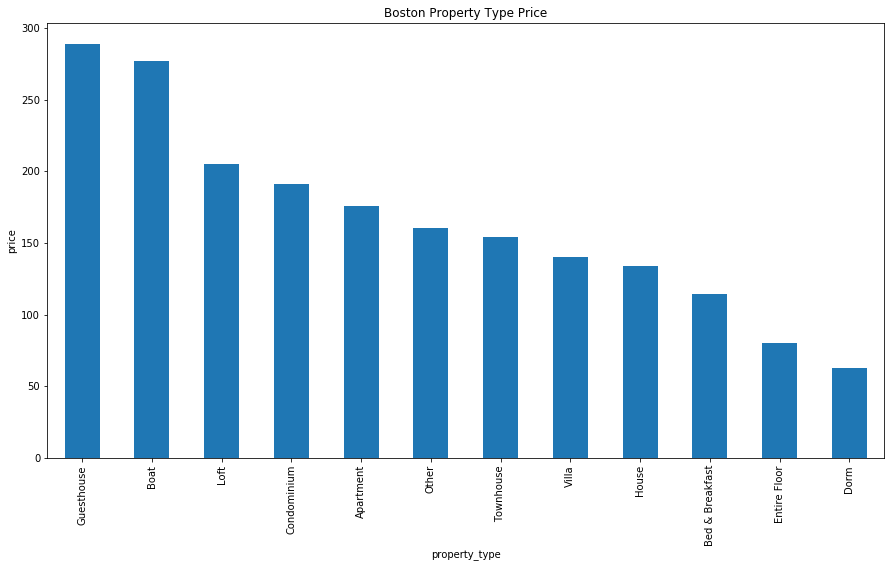

In [13]:
plot_hist(property_type, 'property_type', 'price', 'Boston Property Type Price')

Guest house, boat, and loft are top 3 property types with highest listing prices.

How property owners list the property is also important, such as private rooms, shared rooms or entire property. Therefore, room type is the next feature to look at.

In [22]:
# room type
# average price for each room type
room_type = listing_df.groupby('room_type').price.mean()
room_type = room_type.reset_index()
room_type = room_type.sort_values('price',ascending=False)
room_type

,room_type,price
0,Entire home/apt,232.322326
1,Private room,89.505184
2,Shared room,69.903846


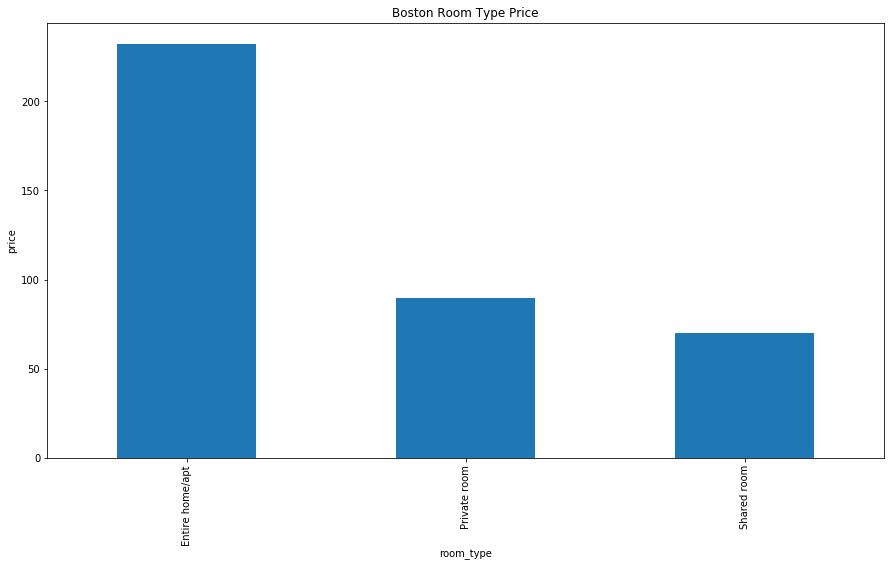

In [15]:
plot_hist(room_type, 'room_type', 'price', 'Boston Room Type Price')

Not surprisingly, entire home/apartment can be listed at the highest price and shared room is the lowest. Then property and room type are to put together to see how they can affect listing prices.

In [20]:
# property and room type
# average price for each property and room type
# break down each listing into propery and room
property_room_type = listing_df.groupby(['property_type','room_type']).price.mean()
property_room_type = property_room_type.reset_index()
property_room_type = property_room_type.sort_values('price',ascending=False)
property_room_type.head()

,property_type,room_type,price
21,Townhouse,Entire home/apt,320.800000
12,Guesthouse,Entire home/apt,289.000000
6,Boat,Private room,287.000000
13,House,Entire home/apt,286.809917
5,Boat,Entire home/apt,275.222222


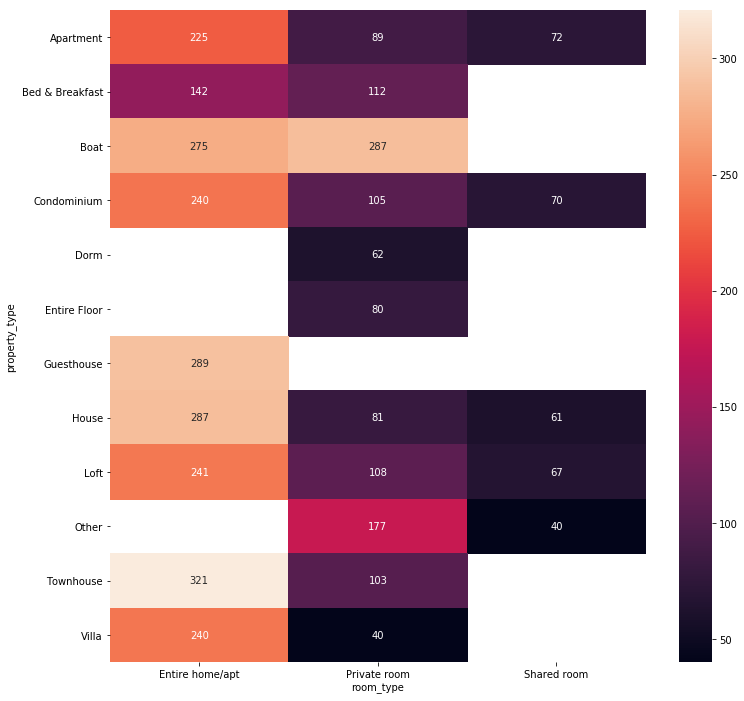

In [21]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(listing_df.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

This chart allows us to see all the listings’ prices broken down by property type and room type. This gives us a much better understanding of the price breakdown in Boston based on property and room types. It can be analyzed that for almost all property type, prices for Entire home/apartment is the maximum. In addition, entire townhouse can be listed at the highest price. This tells us that Property type and room type plays a very important role in deciding price of a listing.

### What time of the year has the highest rental prices?

In [23]:
# read data
cal_df = pd.read_csv('calendar.csv')
cal_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [24]:
# fill 0 for nan for price & only filter listings with price > 0
cal_df.fillna(0, inplace=True)
cal_df = cal_df[cal_df.price != 0]
cal_df['price'] = cal_df['price'].apply(lambda x: float(x[1:].replace(',','')))
cal_df = cal_df[cal_df.price >= 0]

In [25]:
# break the date into year, month, and day for further analysis
cal_df['Year'],cal_df['Month'],cal_df['Day'] = cal_df['date'].str.split('-').str

In [26]:
# get the average price for each year-month combo
year_df = cal_df.groupby(['Year','Month']).price.mean()
year_df = year_df.reset_index()
year_df = year_df.rename(columns={'price':'Average_Price'})
year_df['Year-Month'] = year_df['Year'].map(str) + "-" + year_df['Month'].map(str)

In [153]:
year_df

,Year,Month,Average_Price,Year-Month
0,2016,09,252.677308,2016-09
1,2016,10,233.416248,2016-10
2,2016,11,202.924416,2016-11
3,2016,12,192.601915,2016-12
4,2017,01,182.799671,2017-01
5,2017,02,180.961028,2017-02
6,2017,03,181.818742,2017-03
7,2017,04,197.252890,2017-04
8,2017,05,193.712295,2017-05
9,2017,06,196.535302,2017-06


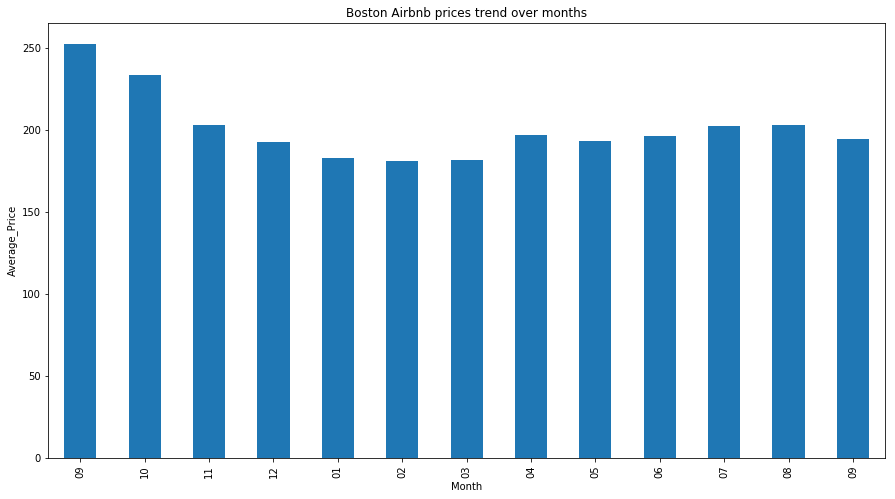

In [27]:
plot_hist(year_df, 'Month', 'Average_Price', 'Boston Airbnb prices trend over months')

It can be clearly seen that the maximum average price for listings were in the month of September and October 2016 and the reason is because of good weather and best time to observe fall colors in Boston. Fall Colors attracts a lot of visitors which makes September and October peak months for Airbnb hosts.

### How can reviews affect prices?

In [34]:
# read data
review_df = pd.read_csv('reviews.csv')
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [35]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jackiezhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# drop null review
# for each review, decompose the review into positivity, negativity, and neutrality score
review_df = review_df.dropna()
review_df['neg']=0.0
review_df['pos']=0.0
review_df['neu']=0.0
review_df['compound']=0.0
for index,row in review_df.iterrows():
    ss = sid.polarity_scores(row['comments'])
    review_df.set_value(index,'neg',ss['neg'])
    review_df.set_value(index,'pos',ss['pos'])
    review_df.set_value(index,'neu',ss['neu'])
    review_df.set_value(index,'compound',ss['compound'])
review_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,listing_id,id,date,reviewer_id,reviewer_name,comments,neg,pos,neu,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.0,0.352,0.648,0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.0,0.361,0.639,0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.0,0.233,0.767,0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.0,0.327,0.673,0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.0,0.363,0.637,0.8658


In [40]:
listing_df = pd.read_csv('listings.csv')
listing_df['price'] = listing_df['price'].apply(lambda x: float(x[1:].replace(',','')))

In [42]:
# merge review with listing_df to get listing price
review_df = review_df.merge(listing_df[['id', 'price']], left_on='listing_id', right_on='id')
review_df.drop(columns=['id_x', 'id_y'], inplace=True)

In [44]:
# Quantile pos, neg, neu scores into 10 buckets and get number of review counts for each bin
def review_counts(col):
    """
    Bin the scores into 10 groups and then count the number of comments in each group
    
    INPUT:
    col: str
        Column name to bin the groups and count the number: 'pos', 'neg', or 'neu'
        
    OUTPUT:
    polar_df: pandas dataframe
        Dataframe with score groups and number of comments in each group
    """
    
    polar_df = review_df[[col]]
    polar_df = polar_df.groupby(pd.cut(polar_df[col], np.arange(0, 1.1, 0.1))).count() #quantile cut the score into 10 buckets
    polar_df = polar_df.rename(columns={col:'count_of_Comments'}) # get the number of comments for each bin
    polar_df = polar_df.reset_index()
    polar_df = polar_df.rename(columns={col:'range_i'})
    for i,r in polar_df.iterrows():
        polar_df.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
        polar_df.set_value(i,'Sentiment',col)
    del polar_df['range_i']
    return polar_df

In [47]:
# positive
polar_df = review_counts('pos')

# negative
polar_neg_df = review_counts('neg')
# merge positive with negative
for i,r in polar_neg_df.iterrows():
    polar_df = polar_df.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
# neutral
polar_neu_df = review_counts('neu')
# merge neutral with positive and negative
for i,r in polar_neu_df.iterrows():
    polar_df = polar_df.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polar_df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarnin

,count_of_Comments,RANGE,Sentiment
0,2863,0.0,pos
1,12152,0.1,pos
2,20837,0.2,pos
3,15771,0.3,pos
4,7424,0.4,pos
5,3014,0.5,pos
6,1265,0.6,pos
7,632,0.7,pos
8,219,0.8,pos
9,105,0.9,pos


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

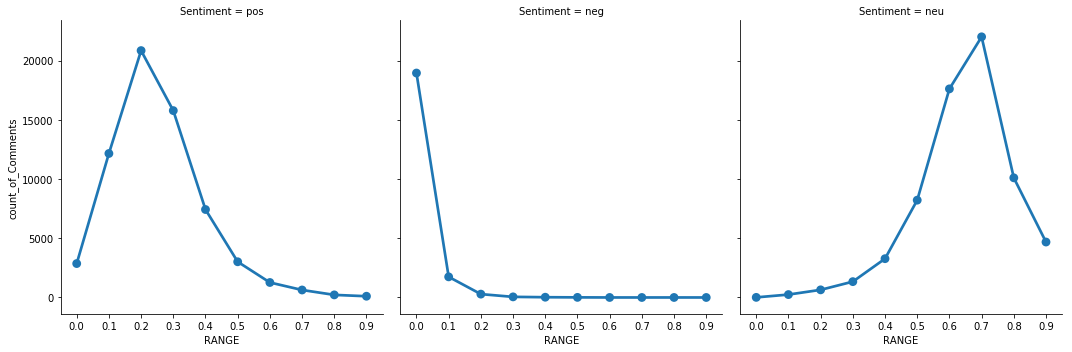

In [48]:
plt.figure(figsize=(10,10))
sns.factorplot(data=polar_df, x="RANGE", y="count_of_Comments",col="Sentiment")

In [231]:
review_price_df = review_df.groupby(['price'])['neg', 'pos', 'neu'].mean().reset_index()

In [232]:
review_price_df

,price,neg,pos,neu
0,11.0,0.016750,0.264083,0.719167
1,20.0,0.000000,0.222000,0.778000
2,22.0,0.009333,0.405333,0.585000
3,25.0,0.053500,0.218750,0.727750
4,28.0,0.089750,0.240938,0.669187
5,29.0,0.011667,0.283167,0.705167
6,30.0,0.071077,0.167538,0.684462
7,31.0,0.013364,0.365818,0.621000
8,32.0,0.016400,0.338400,0.645000
9,33.0,0.015882,0.306294,0.677765


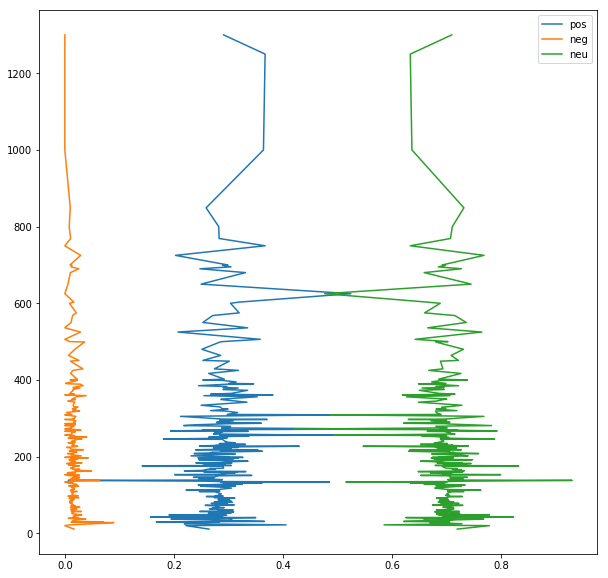

In [237]:
plt.figure(figsize=(10,10))
plt.plot(review_price_df['pos'], review_price_df['price'])
plt.plot(review_price_df['neg'], review_price_df['price'])
plt.plot(review_price_df['neu'], review_price_df['price'])
plt.legend(['pos', 'neg', 'neu'])